In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

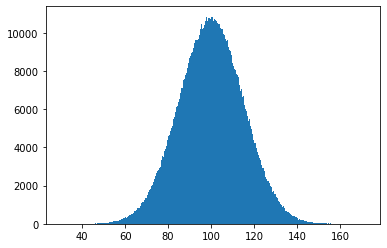

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# show the bias in sample variance

# vars for IQ
pop_mean = 100.0
pop_sigma = 15.0
pop_size = 1000000

population = np.random.normal(pop_mean, pop_sigma, pop_size)

_ = plt.hist(population, bins='auto')
#plt.show()
plt.savefig('iq_pop.png')

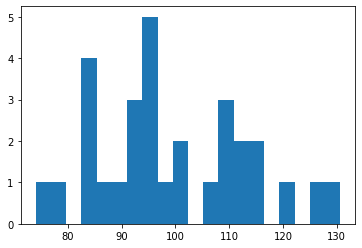

In [3]:
# sample size of 30 from population
population[:10]
num_samps = 10000

#n=30
samps_mini = np.random.choice(population, (num_samps, 30), replace=True)
#n=100
samps_low = np.random.choice(population, (num_samps, 100), replace=True)
#n=1000
samps_mid = np.random.choice(population, (num_samps, 1000), replace=True)
#n=10000
samps_hi = np.random.choice(population, (num_samps, 10000), replace=True)

# example sample to show non-normal
_ = plt.hist(samps_mini[3], bins=20)
#plt.show()
samps_mini.shape
plt.savefig('n30sample.png')

mini max 111.19002656356791 and min 90.62206196316137
low max 105.02974609966479 and min 94.23901287291936
mid max 101.92633363479702 and min 98.2760040490027
hi max 100.56161589181609 and min 99.47702371702415


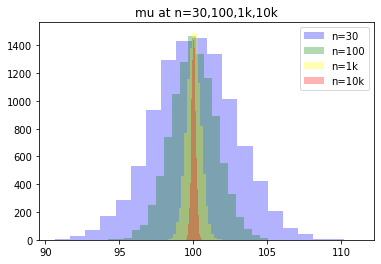

In [4]:
means_mini = np.mean(samps_mini, axis=1)
print("mini max {} and min {}".format(max(means_mini),min(means_mini)))
means_low = np.mean(samps_low, axis=1)
print("low max {} and min {}".format(max(means_low),min(means_low)))
means_mid = np.mean(samps_mid, axis=1)
print("mid max {} and min {}".format(max(means_mid),min(means_mid)))
means_hi = np.mean(samps_hi, axis=1)
print("hi max {} and min {}".format(max(means_hi),min(means_hi)))
kwargs = dict(histtype='stepfilled', alpha=0.3, bins=20)

plt.hist(means_mini, **kwargs, color='blue', label='n=30')
plt.hist(means_low, **kwargs, color='green', label='n=100')
plt.hist(means_mid, **kwargs, color= 'yellow', label='n=1k')
plt.hist(means_hi, **kwargs, color='red', label='n=10k')
plt.title('mu at n=30,100,1k,10k')
plt.legend()
plt.savefig('mus.png')

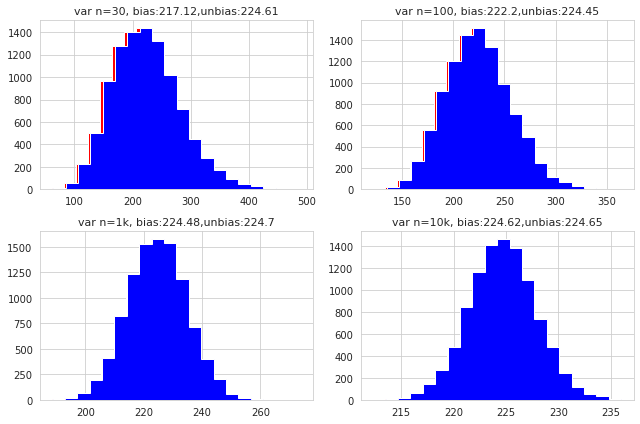

In [39]:
# calculate var with n, n-1, n+1, compare with population variance
pop_var = np.var(population)
pop_var

# for n=30
var_mini_n = np.zeros(num_samps, dtype=np.float64)
np.var(samps_mini, axis=1, dtype=np.float64, out=var_mini_n)
var_mini_dof = np.zeros(num_samps, dtype=np.float64)
np.var(samps_mini, axis=1, dtype=np.float64, out=var_mini_dof, ddof=1)

# for n=100
var_low_n = np.zeros(num_samps, dtype=np.float64)
np.var(samps_low, axis=1, dtype=np.float64, out=var_low_n)
var_low_dof = np.zeros(num_samps, dtype=np.float64)
np.var(samps_low, axis=1, dtype=np.float64, out=var_low_dof, ddof=1)

# for n=1000
var_mid_n = np.zeros(num_samps, dtype=np.float64)
np.var(samps_mid, axis=1, dtype=np.float64, out=var_mid_n)
var_mid_dof = np.zeros(num_samps, dtype=np.float64)
np.var(samps_mid, axis=1, dtype=np.float64, out=var_mid_dof, ddof=1)

# for n=10k
var_hi_n = np.zeros(num_samps, dtype=np.float64)
np.var(samps_hi, axis=1, dtype=np.float64, out=var_hi_n)
var_hi_dof = np.zeros(num_samps, dtype=np.float64)
np.var(samps_hi, axis=1, dtype=np.float64, out=var_hi_dof, ddof=1)

n_bins = 100

kwargs = dict(histtype='stepfilled', bins=20) #alpha=0.3
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9,6))
ax0, ax1, ax2, ax3 = axes.flatten()

ax0.hist(var_mini_n, **kwargs, color='red')
ax0.hist(var_mini_dof, **kwargs, color='blue')
ax0.set_title('var n=30, bias:{},unbias:{}'.format(round(np.mean(var_mini_n),2),
              round(np.mean(var_mini_dof),2)),fontsize=11)

ax1.hist(var_low_n, **kwargs, color='red')
ax1.hist(var_low_dof, **kwargs, color='blue')
ax1.set_title('var n=100, bias:{},unbias:{}'.format(round(np.mean(var_low_n),2),
              round(np.mean(var_low_dof),2)),fontsize=11)

ax2.hist(var_mid_n, **kwargs, color='red')
ax2.hist(var_mid_dof, **kwargs, color='blue')
ax2.set_title('var n=1k, bias:{},unbias:{}'.format(round(np.mean(var_mid_n),2),
              round(np.mean(var_mid_dof),2)),fontsize=11)

ax3.hist(var_hi_n, **kwargs, color='red')
ax3.hist(var_hi_dof, **kwargs, color='blue')
ax3.set_title('var n=10k, bias:{},unbias:{}'.format(round(np.mean(var_hi_n),2),
              round(np.mean(var_hi_dof),2)),fontsize=11)

plt.savefig('var_distrib.png')
fig.tight_layout()

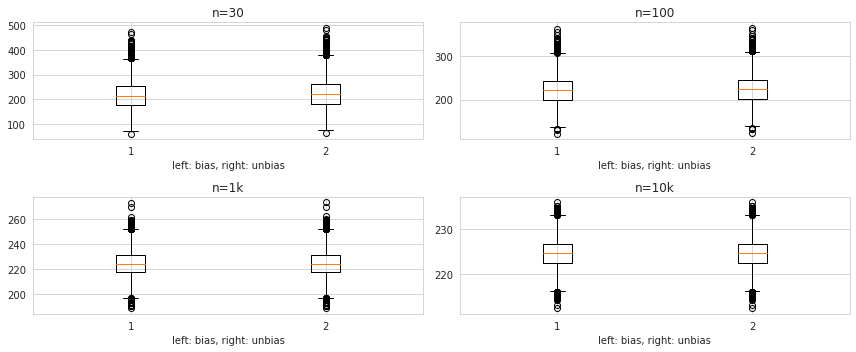

In [42]:
#boxplot and density plots of bias data
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

fig, axs = plt.subplots(nrows=2, ncols=2,figsize=(12,5))
label= 'left: bias, right: unbias'
titles=['n=30','n=100','n=1k','n=10k']

#make a list of data
var_mini = [var_mini_n, var_mini_dof]
var_low = [var_low_n, var_low_dof]
var_mid = [var_mid_n, var_mid_dof]
var_hi = [var_hi_n, var_hi_dof]
var_all= [var_mini, var_low, var_mid, var_hi]


for i, ax in enumerate(axs.flatten()):
    ax.boxplot(var_all[i])
    ax.set_xlabel(label)
    ax.set_title(titles[i])
fig.tight_layout()

plt.savefig('vars_boxplot.png')



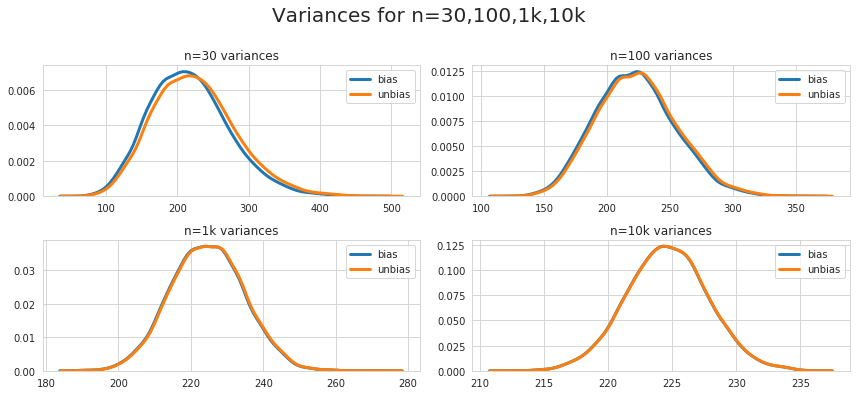

In [43]:
# density plots
import seaborn as sns


#make a list of data
var_mini = [var_mini_n, var_mini_dof]
label = ['bias', 'unbias']
var_low = [var_low_n, var_low_dof]
var_mid = [var_mid_n, var_mid_dof]
var_hi = [var_hi_n, var_hi_dof]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,5))

plt.suptitle('Variances for n=30,100,1k,10k',y=1.09,fontsize=20)
for i in range(len(var_mini)):
    sns.distplot(var_mini[i], hist=False, kde=True, kde_kws={'linewidth':3}, label=label[i], ax=axs[0,0])
axs[0,0].set_title('n=30 variances')

for i in range(len(var_low)):
    sns.distplot(var_low[i], hist=False, kde=True, kde_kws={'linewidth':3}, label=label[i], ax=axs[0,1])
axs[0,1].set_title('n=100 variances')

for i in range(len(var_mid)):
    sns.distplot(var_mid[i], hist=False, kde=True, kde_kws={'linewidth':3}, label=label[i], ax=axs[1,0])
axs[1,0].set_title('n=1k variances')

for i in range(len(var_hi)):
    sns.distplot(var_hi[i], hist=False, kde=True, kde_kws={'linewidth':3}, label=label[i], ax=axs[1,1])
axs[1,1].set_title('n=10k variances')

#spread figs out
fig.tight_layout()

plt.savefig('vars_density.png')
